In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/bank_marketing.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [3]:
df.shape

(45211, 17)

In [4]:
# percentual de nulos
(df.isna().sum() / df.shape[0] * 100).round(2)

age             0.00
job             0.64
marital         0.00
education       4.11
default         0.00
balance         0.00
housing         0.00
loan            0.00
contact        28.80
day_of_week     0.00
month           0.00
duration        0.00
campaign        0.00
pdays           0.00
previous        0.00
poutcome       81.75
y               0.00
dtype: float64

In [5]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
nan_cols = ['job', 'education', 'contact', 'poutcome']
df[nan_cols] = df[nan_cols].fillna('unknown')

df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Análise univariada

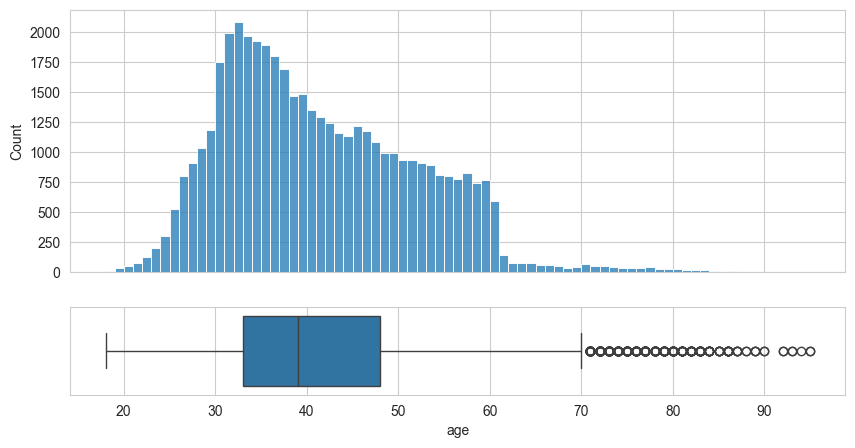

In [7]:
# Age
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df['age'], binwidth=1, ax=ax_hist)
sns.boxplot(x=df['age'], ax=ax_boxplot)
plt.show()

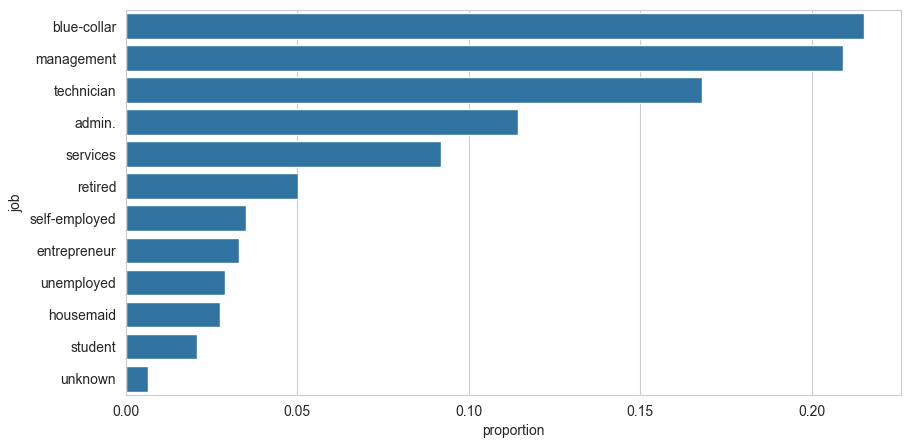

In [8]:
# Job
plt.figure(figsize=(10, 5))
sns.barplot(df['job'].value_counts(normalize=True).reset_index(), y='job', x='proportion')
plt.show()

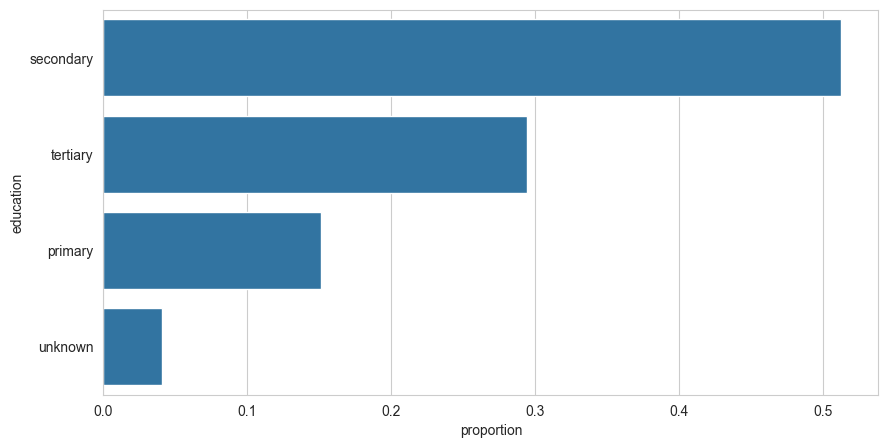

In [9]:
# education
plt.figure(figsize=(10, 5))
sns.barplot(df['education'].value_counts(normalize=True).reset_index(), y='education', x='proportion')
plt.show()

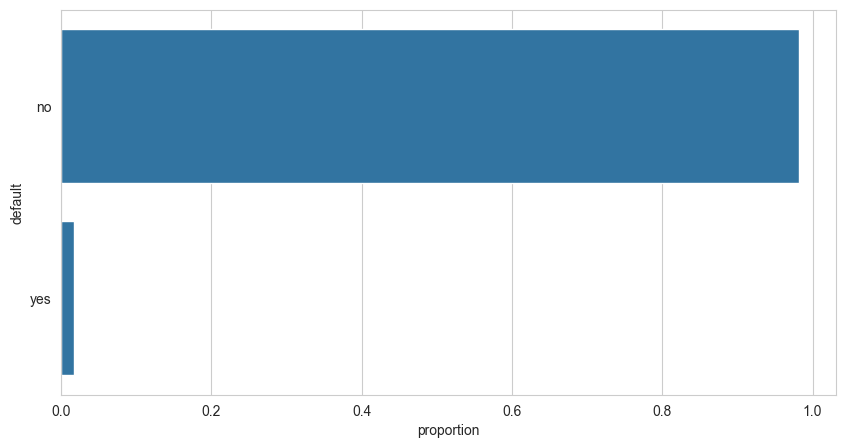

In [10]:
# default
plt.figure(figsize=(10, 5))
sns.barplot(df['default'].value_counts(normalize=True).reset_index(), y='default', x='proportion')
plt.show()

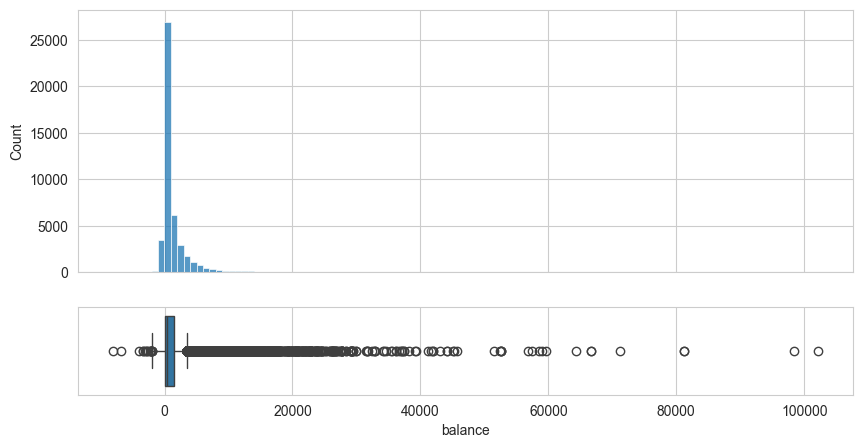

In [11]:
# Balance
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df['balance'], binwidth=1000, ax=ax_hist)
sns.boxplot(x=df['balance'], ax=ax_boxplot)

plt.show()

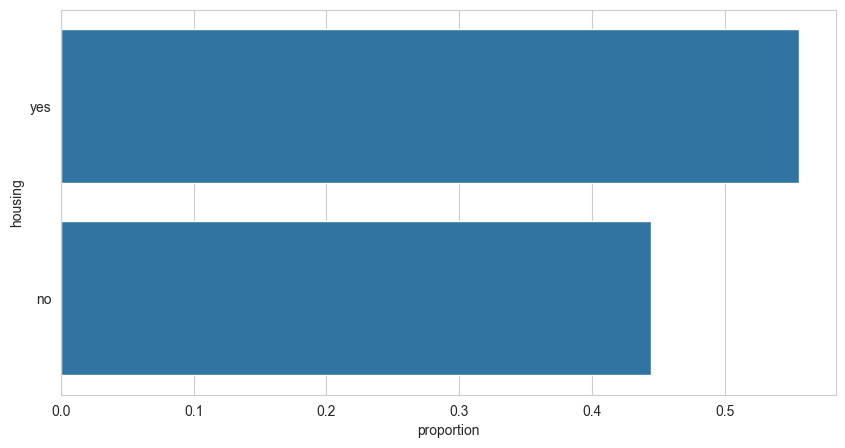

In [12]:
# housing
plt.figure(figsize=(10, 5))
sns.barplot(df['housing'].value_counts(normalize=True).reset_index(), y='housing', x='proportion')
plt.show()

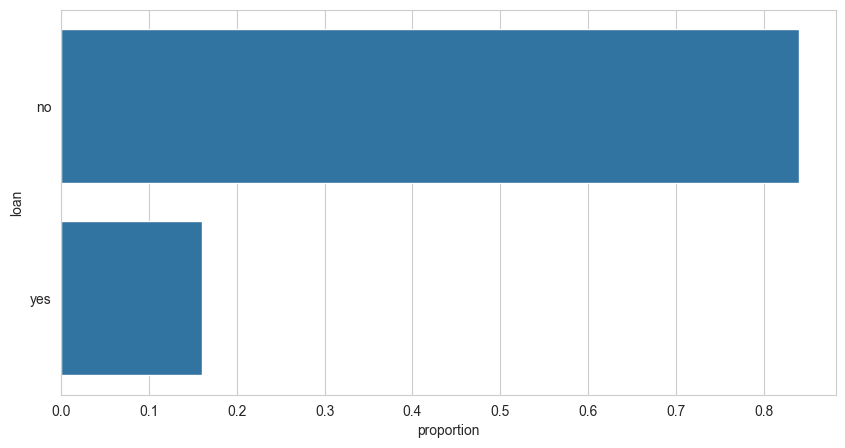

In [13]:
# loan
plt.figure(figsize=(10, 5))
sns.barplot(df['loan'].value_counts(normalize=True).reset_index(), y='loan', x='proportion')
plt.show()

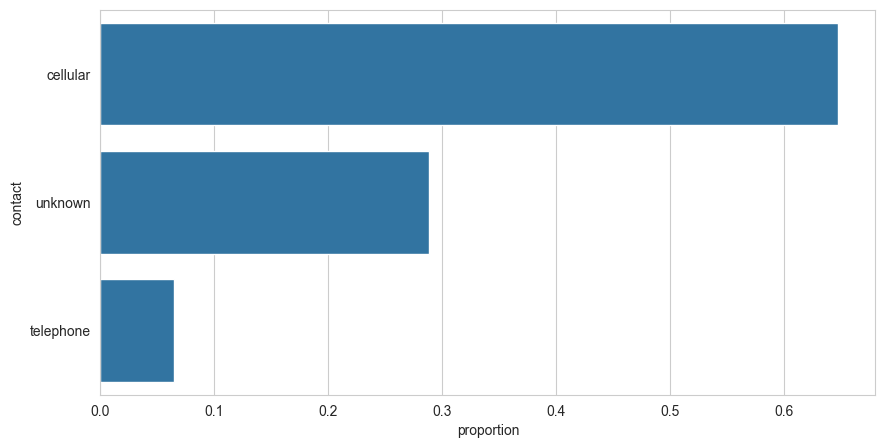

In [14]:
# contact
plt.figure(figsize=(10, 5))
sns.barplot(df['contact'].value_counts(normalize=True).reset_index(), y='contact', x='proportion')
plt.show()

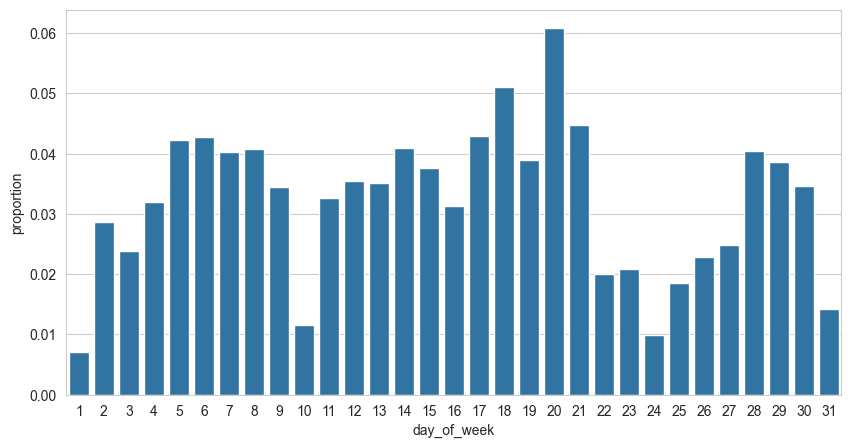

In [15]:
# day_of_week
plt.figure(figsize=(10, 5))
sns.barplot(df['day_of_week'].value_counts(normalize=True).reset_index(), x='day_of_week', y='proportion')
plt.show()

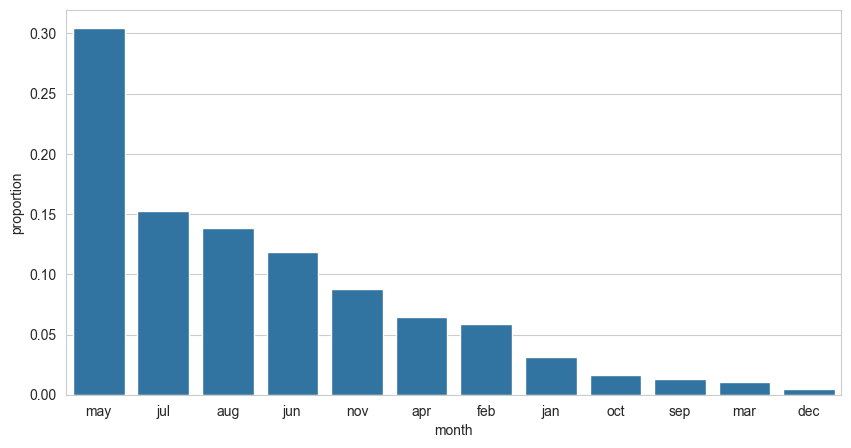

In [16]:
# month
plt.figure(figsize=(10, 5))
sns.barplot(df['month'].value_counts(normalize=True).reset_index(), x='month', y='proportion')
plt.show()

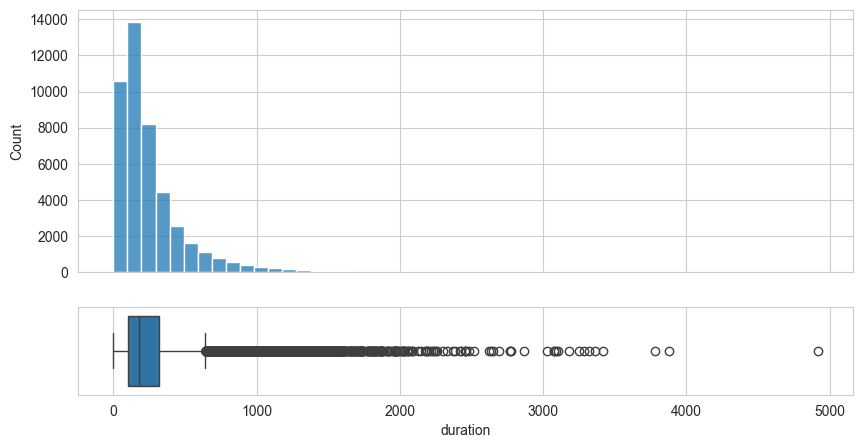

In [17]:
# duration
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df['duration'], bins=50, ax=ax_hist)
sns.boxplot(x=df['duration'], ax=ax_boxplot)

plt.show()

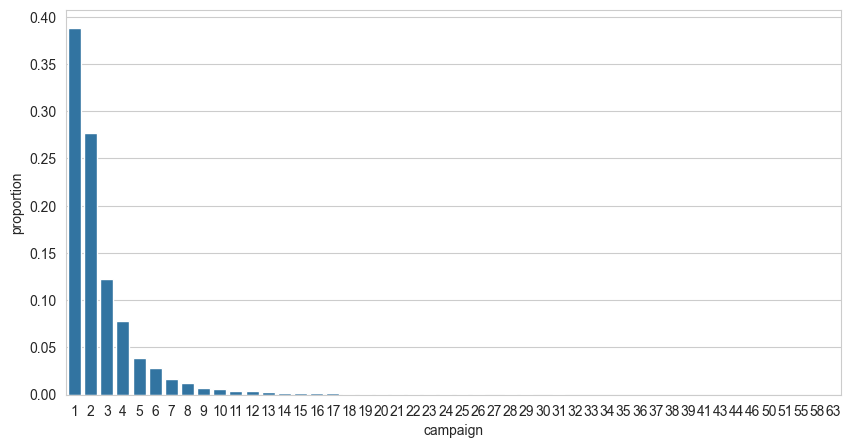

In [18]:
# campaign
plt.figure(figsize=(10, 5))
sns.barplot(df['campaign'].value_counts(normalize=True).reset_index(), x='campaign', y='proportion')
plt.show()

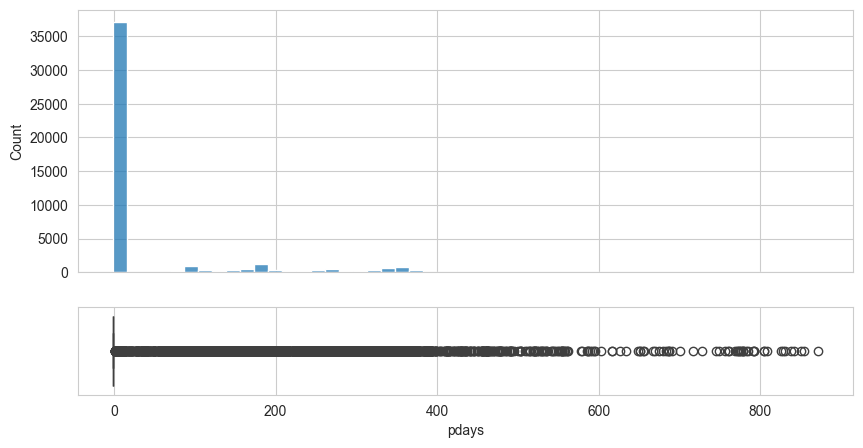

In [19]:
# pdays
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df['pdays'], bins=50, ax=ax_hist)
sns.boxplot(x=df['pdays'], ax=ax_boxplot)

plt.show()

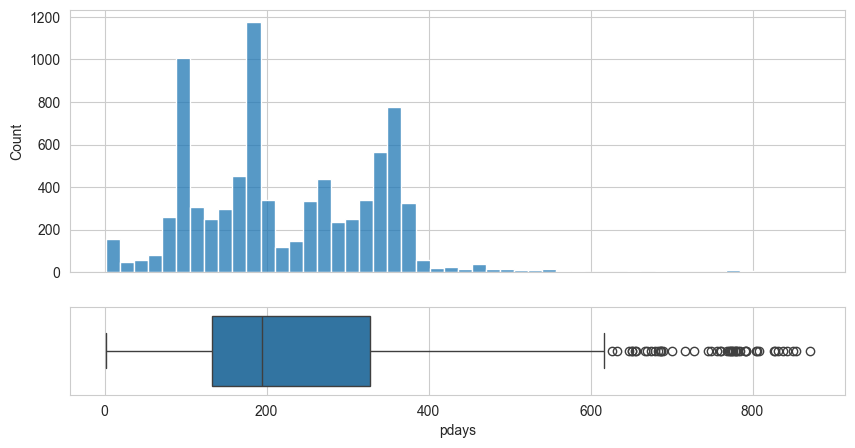

In [20]:
# pdays (greater than 0)
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df.loc[df['pdays'] > 0, 'pdays'], bins=50, ax=ax_hist)
sns.boxplot(x=df.loc[df['pdays'] > 0, 'pdays'], ax=ax_boxplot)

plt.show()

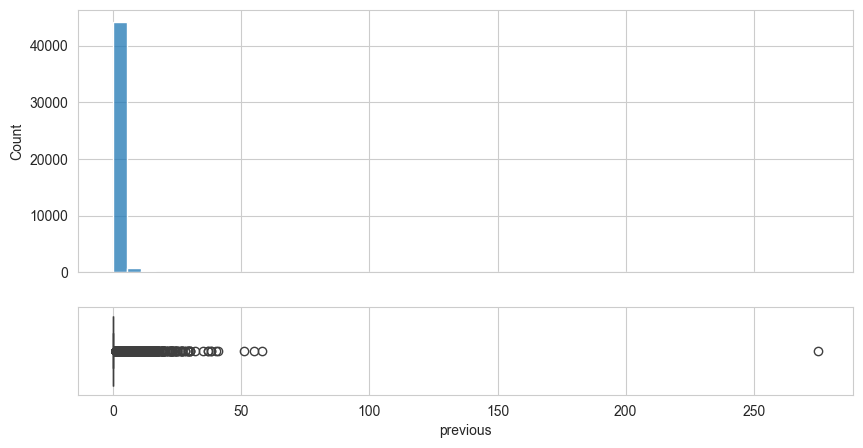

In [21]:
# previous
fig, (ax_hist, ax_boxplot) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': (3, 1)},
    sharex=True,
    figsize=(10, 5)
)

sns.histplot(df['previous'], bins=50, ax=ax_hist)
sns.boxplot(x=df['previous'], ax=ax_boxplot)

plt.show()

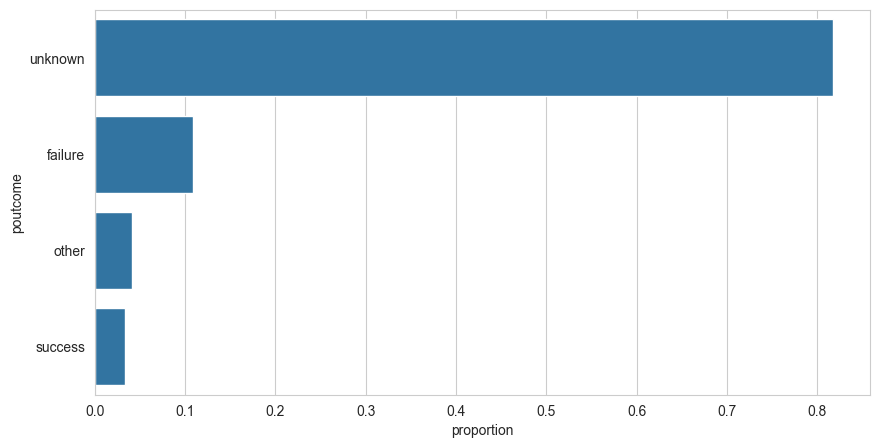

In [22]:
# poutcome
plt.figure(figsize=(10, 5))
sns.barplot(df['poutcome'].value_counts(normalize=True).reset_index(), y='poutcome', x='proportion')
plt.show()

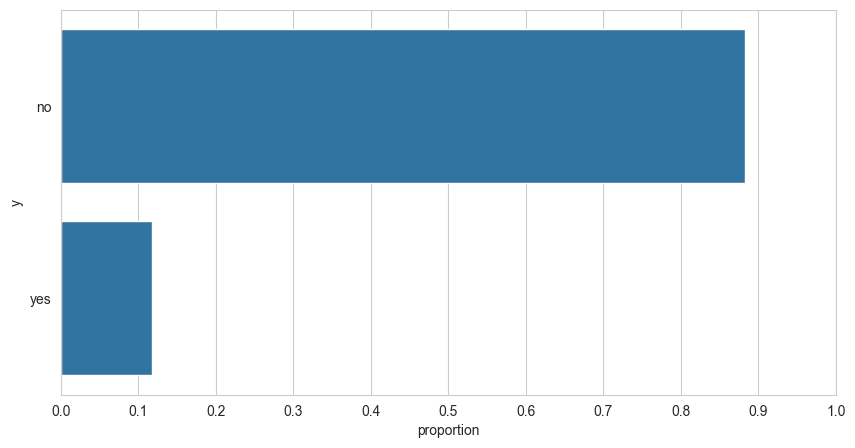

In [23]:
# y
plt.figure(figsize=(10, 5))
sns.barplot(df['y'].value_counts(normalize=True).reset_index(), y='y', x='proportion')
plt.xticks(np.arange(0, 1.1, .1))
plt.show()

## Análise bivariada

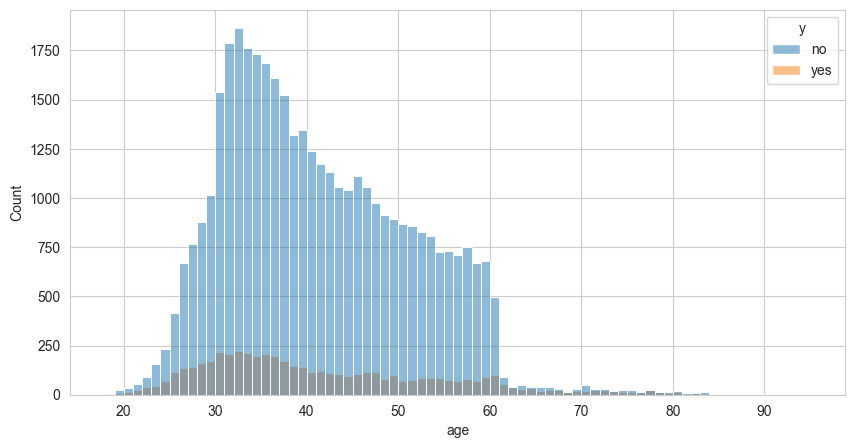

In [24]:
# older customers are more inclined to subscribe
plt.figure(figsize=(10, 5))
sns.histplot(df, x='age', hue='y', binwidth=1)
plt.show()

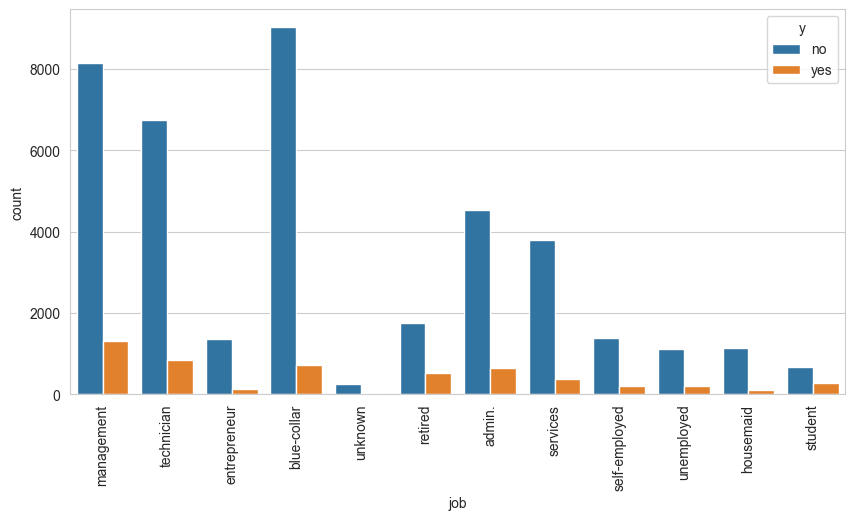

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='job', hue='y')
plt.xticks(rotation=90)
plt.show()

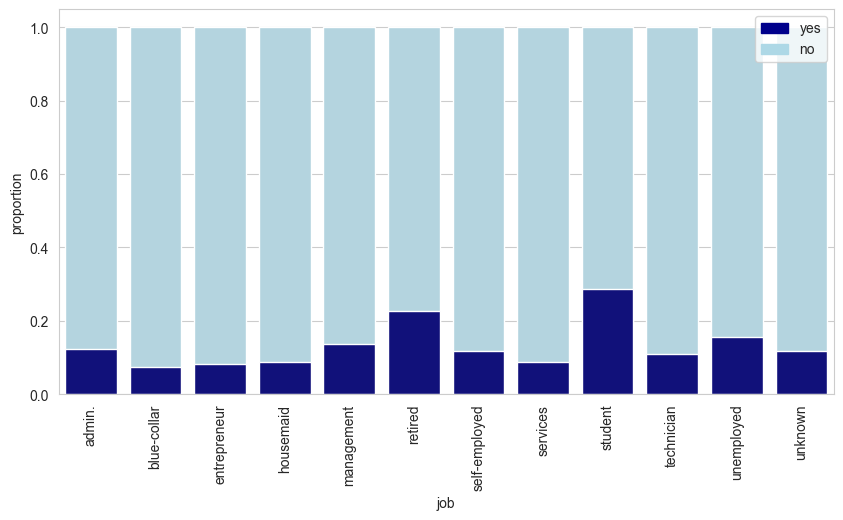

In [26]:
df_job = df.groupby('job').value_counts('y', normalize=True).reset_index()

plt.figure(figsize=(10, 5))
job_no = sns.barplot(df_job.groupby('job').sum(), x='job', y='proportion', color='lightblue')
job_yes = sns.barplot(df_job.loc[df_job['y'] == 'yes'], x='job', y='proportion', color='darkblue')

top_bar = mpatches.Patch(color='darkblue', label='yes')
bottom_bar = mpatches.Patch(color='lightblue', label='no')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=90)
plt.show()

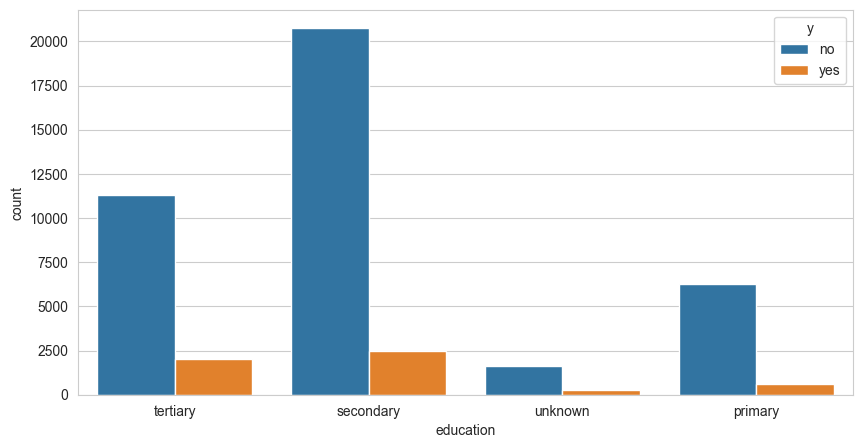

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='education', hue='y')
plt.show()

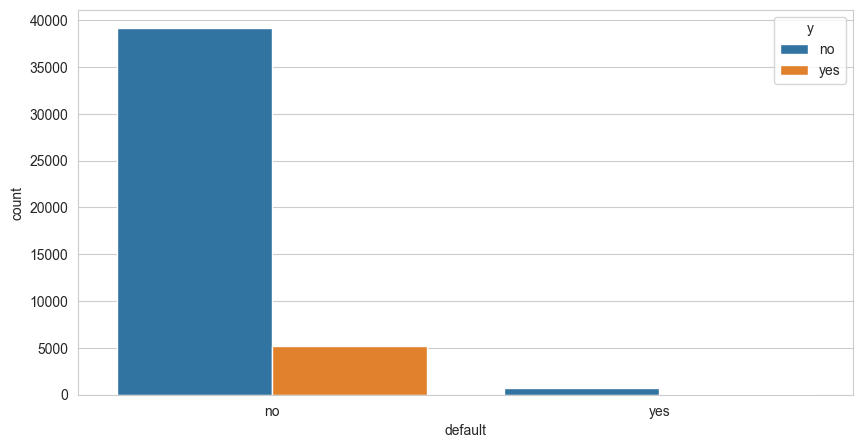

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='default', hue='y')
plt.show()

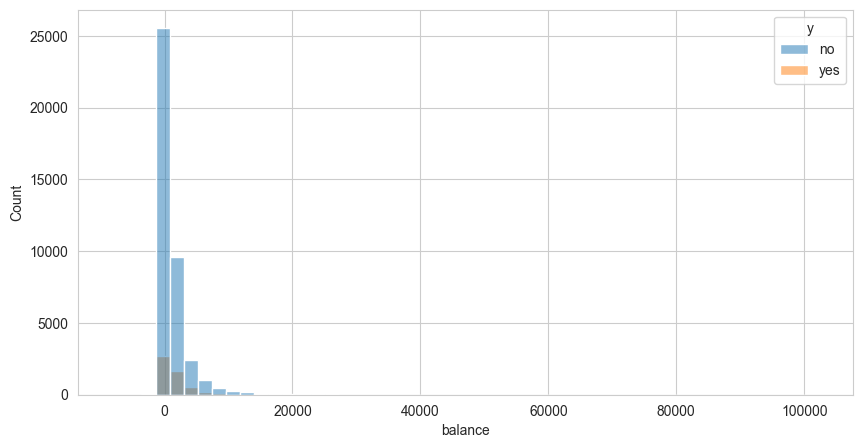

In [29]:
# balance
plt.figure(figsize=(10, 5))
sns.histplot(df, x='balance', hue='y', bins=50)
plt.show()

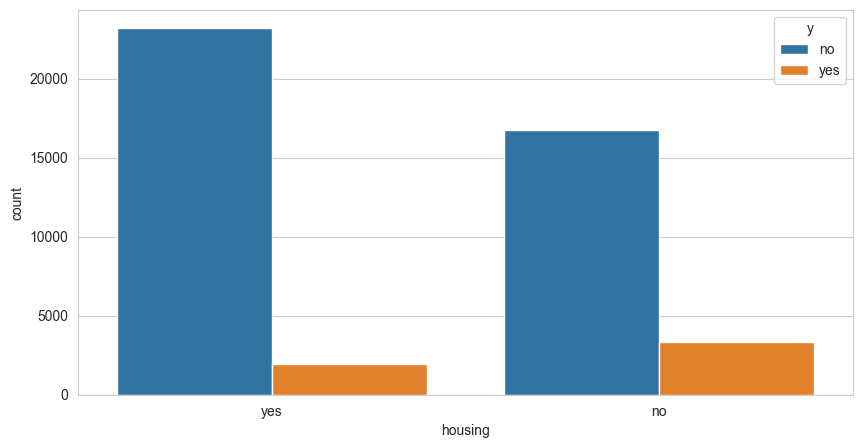

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='housing', hue='y')
plt.show()

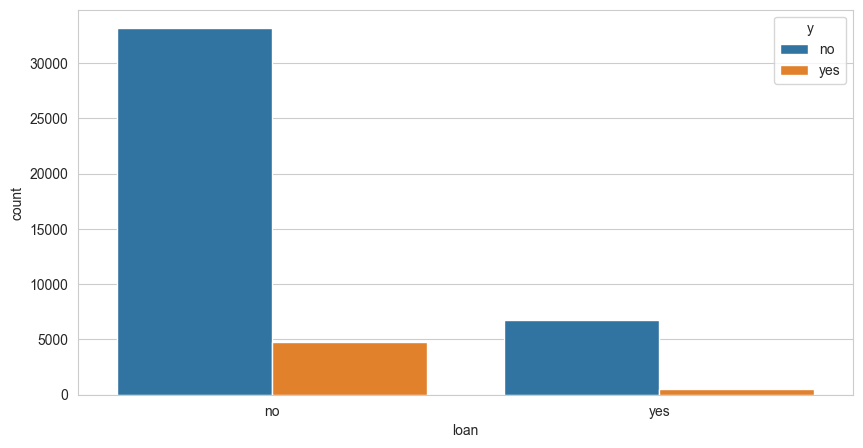

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='loan', hue='y')
plt.show()

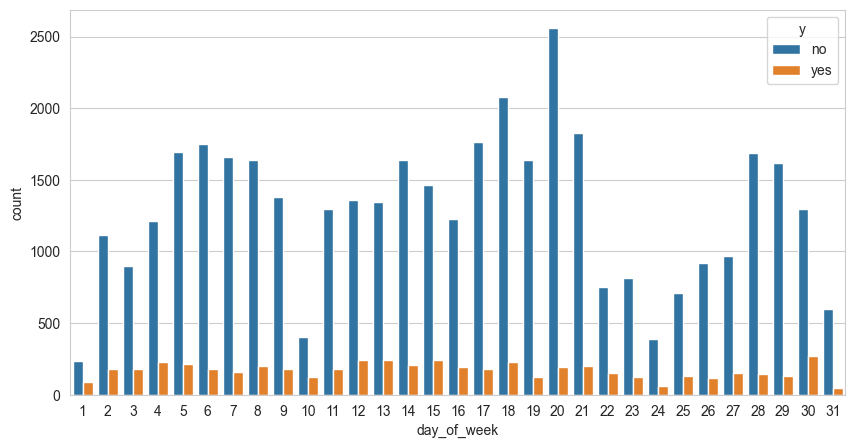

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='day_of_week', hue='y')
plt.show()

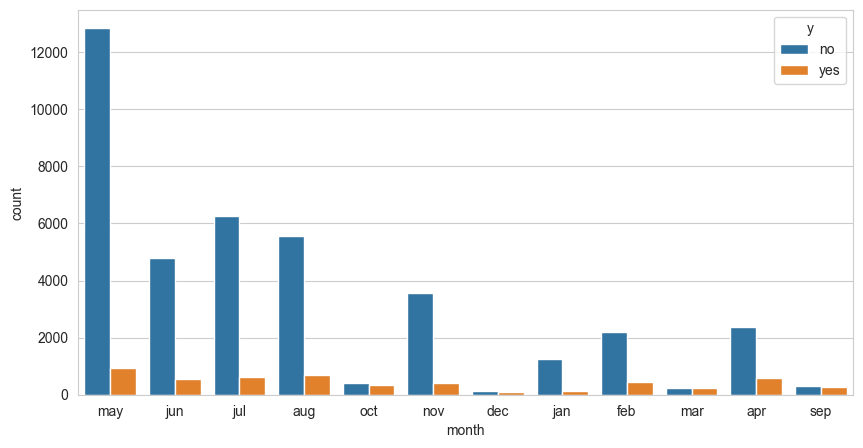

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='month', hue='y')
plt.show()

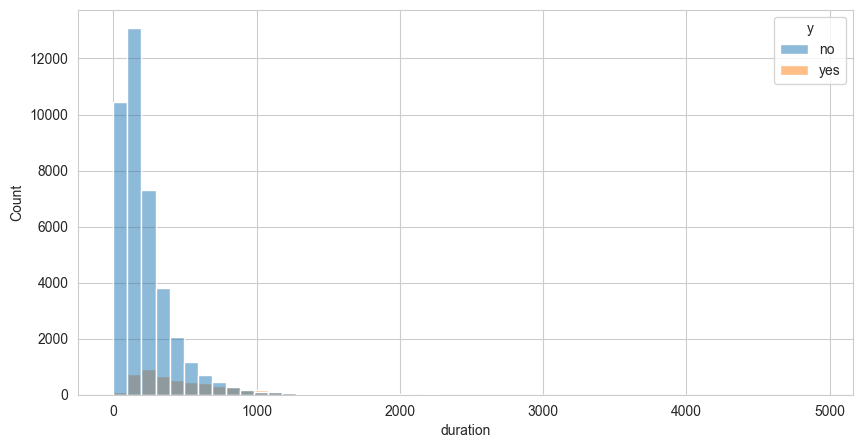

In [34]:
# duration
plt.figure(figsize=(10, 5))
sns.histplot(df, x='duration', hue='y', bins=50)
plt.show()

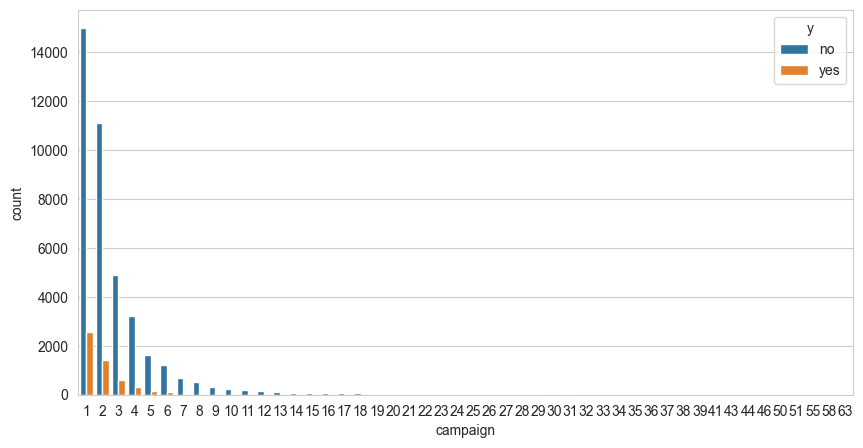

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='campaign', hue='y')
plt.show()

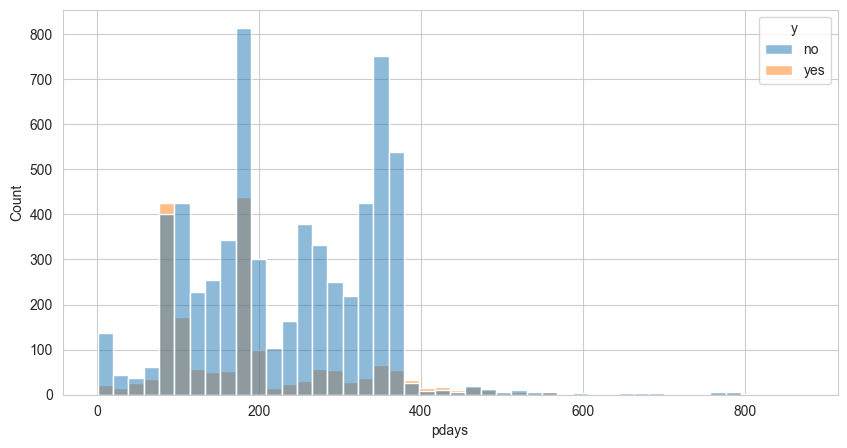

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df.loc[df['pdays'] > 0], x='pdays', hue='y')
plt.show()

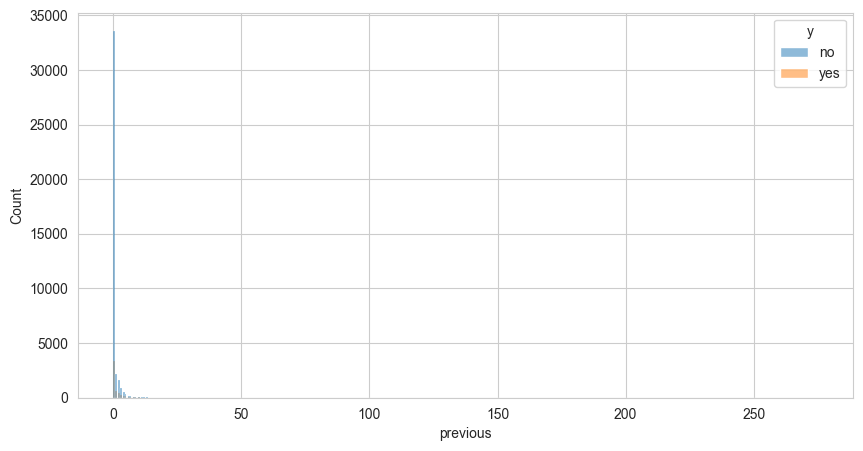

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='previous', hue='y')
plt.show()

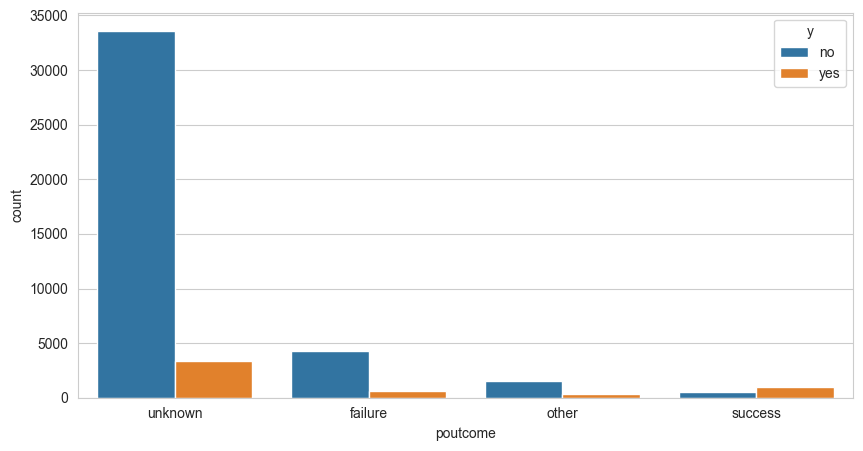

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='poutcome', hue='y')
plt.show()

## Análise multivariada

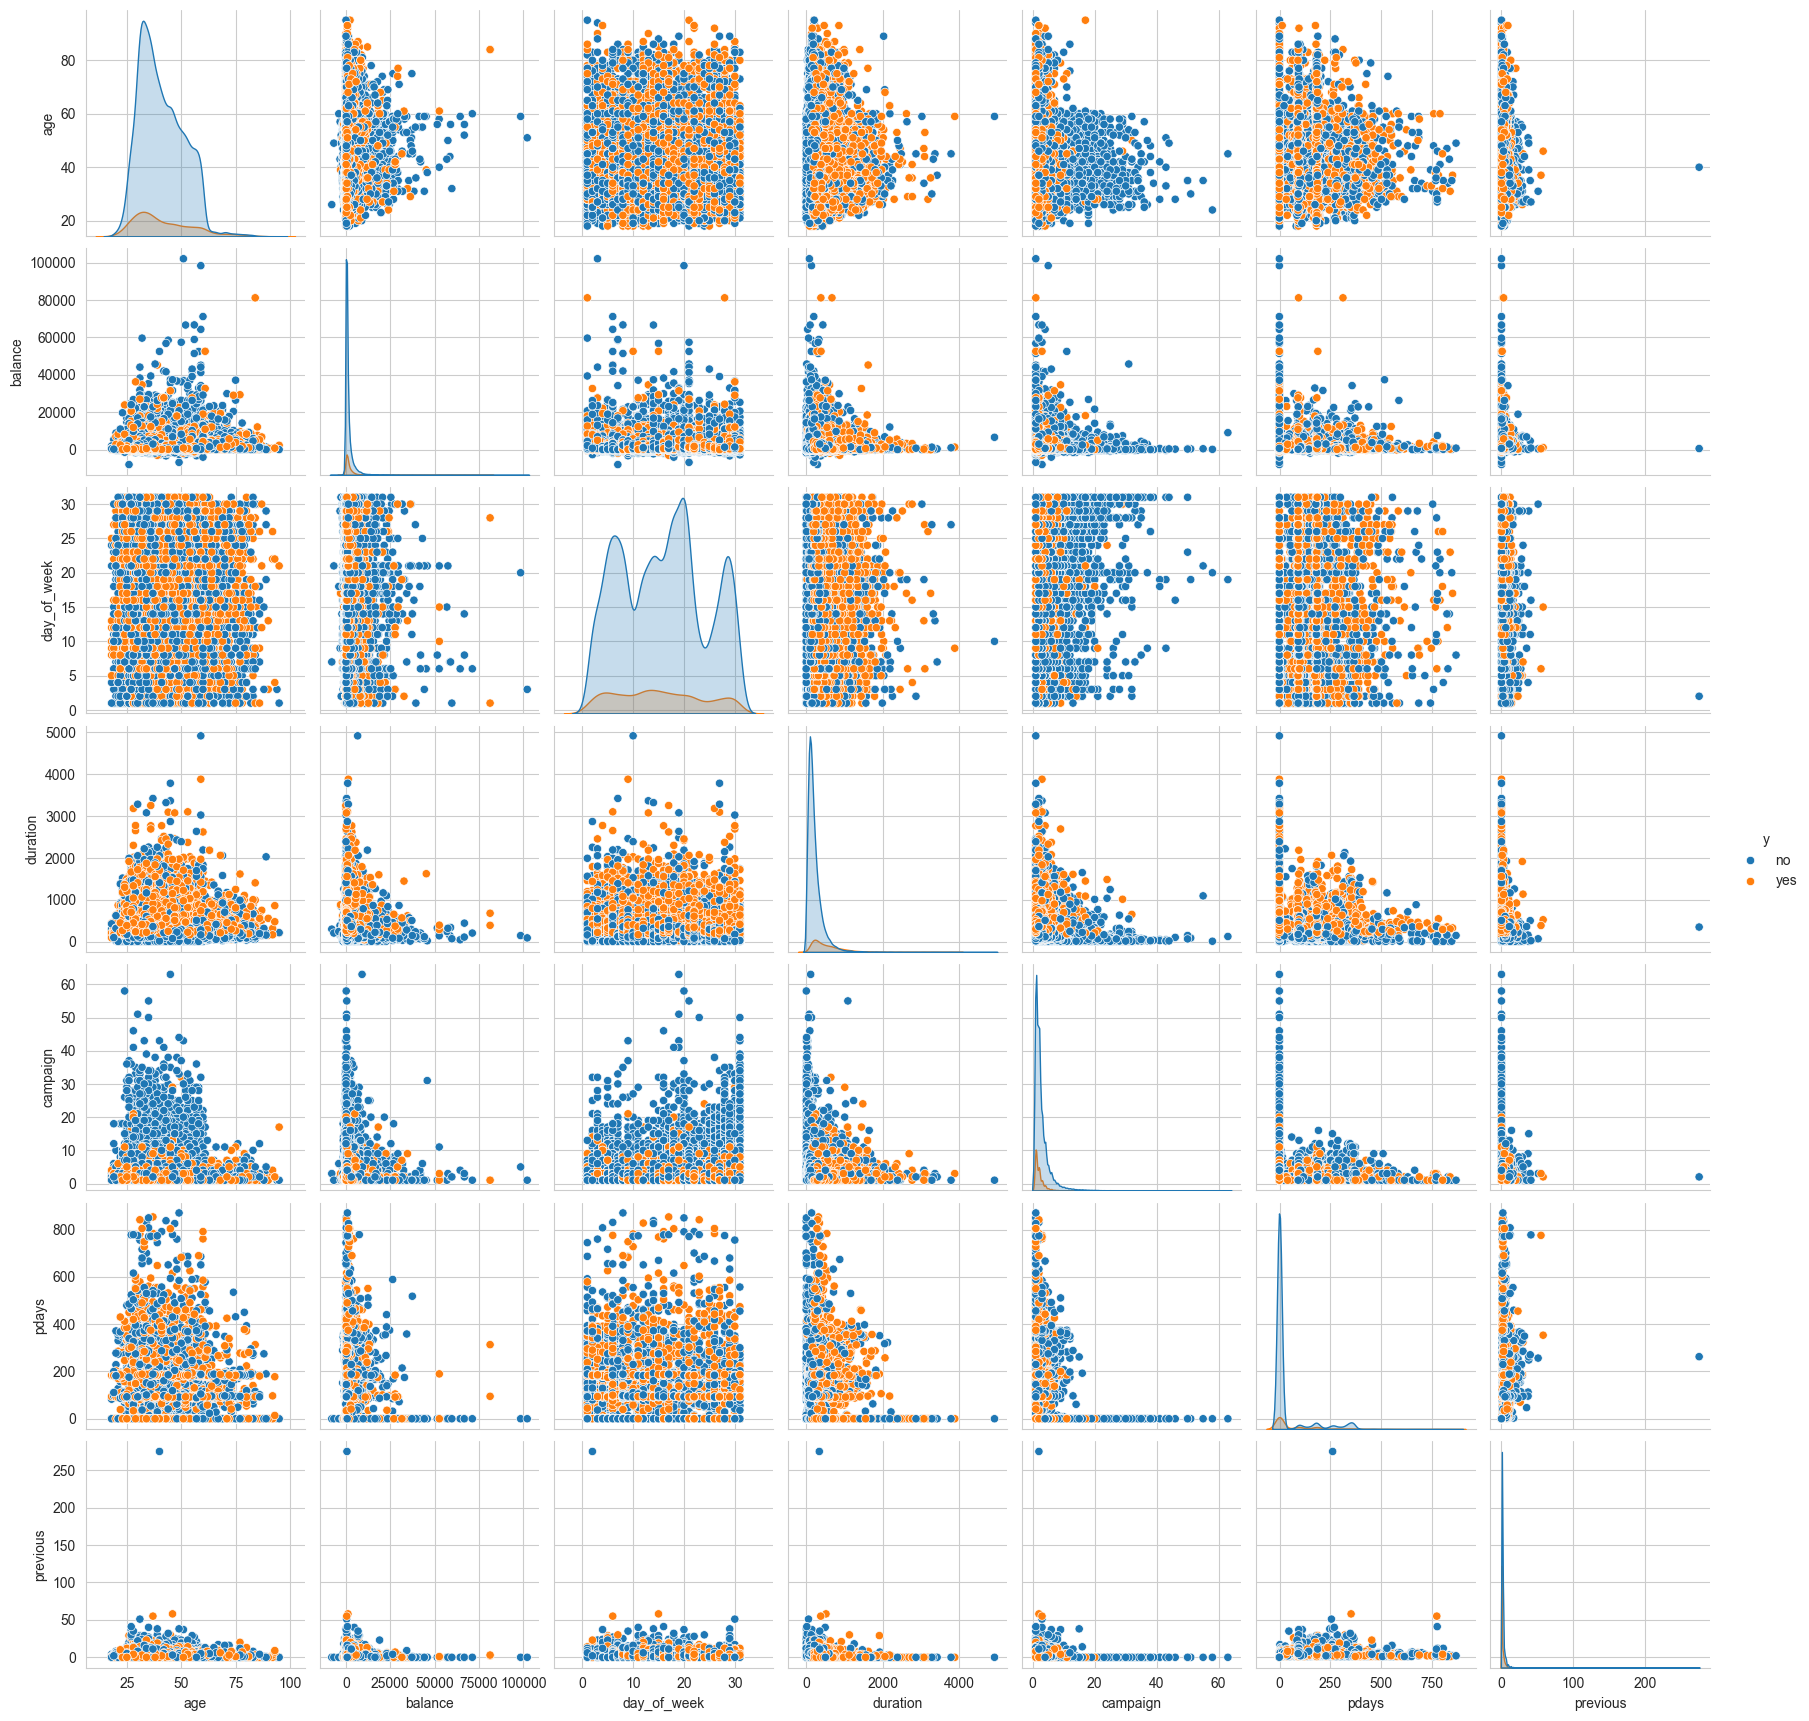

In [39]:
sns.pairplot(df, hue='y')

In [40]:
df.groupby(['job', 'marital'])['y'].value_counts().reset_index().sort_values('count', ascending=False).head(20)

,job,marital,y,count
8,blue-collar,married,no,6531
26,management,married,no,4719
56,technician,married,no,3636
28,management,single,no,2469
2,admin.,married,no,2387
58,technician,single,no,2273
44,services,married,no,2229
10,blue-collar,single,no,1801
4,admin.,single,no,1493
32,retired,married,no,1349


In [41]:
df.groupby(['job', 'marital'])['y'].value_counts(normalize=True).reset_index().sort_values('proportion', ascending=False).tail(36)

,job,marital,y,proportion
53,student,single,yes,0.293850
31,retired,divorced,yes,0.284706
33,retired,married,yes,0.220682
65,unemployed,single,yes,0.194514
41,self-employed,single,yes,0.192825
51,student,married,yes,0.185185
71,unknown,single,yes,0.176471
49,student,divorced,yes,0.166667
23,housemaid,single,yes,0.166667
29,management,single,yes,0.162199
